<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/LinearRegression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Intro to ML/Datasets/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# Import values of X1, X2, X3
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]

# Acquire length of X matricies
m = len(X1)

# Reshape for operation
ones = np.ones((m,1))
X1 = X1.reshape(m,1)
X2 = X2.reshape(m,1)
X3 = X3.reshape(m,1)

# Combine to one matrix
X = np.hstack((ones, X1, X2, X3))

# Import Y
Y = df.values[:, 3]

# Theta value for each (X0, X1, X2, X3)
theta = np.zeros(4)

In [127]:
def compute_cost(X, Y, theta):
  '''
  X : 2D array training samples
  Y : 1D array target values
  Theta: parameters

  returns:
  J : Cost of parameters
  '''
  # Multiply X matrix with Theta matrix (hypothesis function)
  predictions = X.dot(theta)
  # Perform [1/(2m)(h-y)^2] to find loss function
  errors = np.subtract(predictions,Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

def gradient_descent(X, Y, theta, alpha, iteration):
  '''
  X : 2D array training samples
  Y : 1D array target values
  Theta: parameters
  Alpha: learning rate
  Iterations : number of iterations

  returns:
  Theta: updated parameters
  cost_history: cost from each iteration
  '''
  cost_history = np.zeros(iteration)

  for i in range(iteration):
    # perform gradient descent formula
    #
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, Y, theta)

  return theta, cost_history

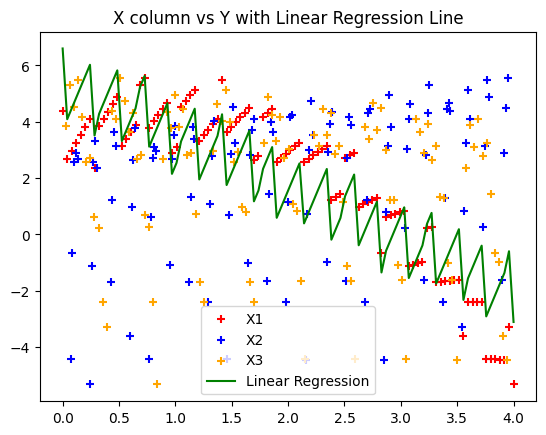

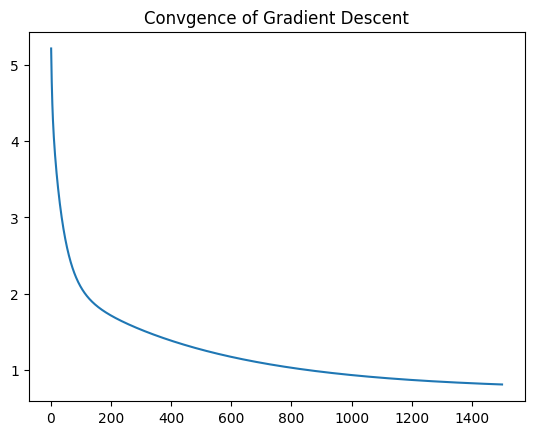

In [128]:
iteration = 1500
alpha = 0.01

# Call function
theta, cost_history = gradient_descent(X, Y, theta, alpha, iteration)

# Plot linear regression and loss
plt.scatter(X1, Y, color = 'red', marker = '+', label = 'X1')
plt.scatter(X2, Y, color = 'blue', marker = '+', label = 'X2')
plt.scatter(X3, Y, color = 'orange', marker = '+', label = 'X3')
plt.plot(X[:, 1], X.dot(theta), color = 'green', label = 'Linear Regression')

plt.title("X column vs Y with Linear Regression Line")
plt.legend()
plt.show()

plt.plot(range(1, iteration+1), cost_history);

plt.title("Convgence of Gradient Descent")
plt.show()